In [1]:
from bs4 import BeautifulSoup
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the Wikipedia URL to scrape
URL = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [5]:
# Send a request to fetch the page content
response = requests.get(URL)
# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    Soup = BeautifulSoup(response.text, 'html.parser')
print(Soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of largest companies in the United States by revenue - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientp

In [7]:
# Locate the first table on the page
first_table = Soup.find_all('table')[0]
first_table 

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [9]:
#Locate the table heading in the first table 
table_heading = first_table.find_all('th')
table_heading 

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [11]:
#Extract table header
tables_heading = [tittle.text.strip() for tittle in table_heading] 
print(tables_heading)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [13]:
#Save the table header in a dataFrame 
df = pd.DataFrame(columns = tables_heading)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [15]:
# Locate the table row 
table_row = first_table.find_all('tr')
table_row 

[<tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD millions)
 </th>
 <th>Revenue growth
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>,
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">648,125
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
 </td>
 <td style="text-align:cent

In [17]:
#Extract the table data and save in a DataFrame 
for data in table_row[1:]:
    table_data = data.find_all('td')
    tables_data = [data.text.strip() for data in table_data]
    length = len(df)
    df.loc[length]= tables_data

In [19]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [21]:
pd.set_option('display.max_rows', 100)  

In [23]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
5,6,CVS Health,Healthcare,"357,776",10.9%,"259,500","Woonsocket, Rhode Island"
6,7,ExxonMobil,Petroleum industry,"344,582",-16.7%,"61,500","Spring, Texas"
7,8,Alphabet,Technology and cloud computing,"307,394",8.7%,"182,502","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,000","Irving, Texas"
9,10,Cencora,Pharmacy wholesale,"262,173",9.9%,"44,000","Conshohocken, Pennsylvania"


Data Cleaning 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [27]:
#Checking for the total sum of duplicates in the data set 
df.duplicated().sum()

0

In [29]:
#Converting the the data type to integer 
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(int)

In [31]:
#Converting the the data type to integer 
df['Employees'] = df['Employees'].str.replace(',', '').astype(int)

In [33]:
#Convert the the data type to Float
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '').astype(float)

In [35]:
#Renaming the column 
df.rename(columns={'Revenue growth': 'Revenue_Growth(%)'}, inplace=True)

In [37]:
df['Industry'] = df['Industry'].replace({'Financial': 'Financials'})

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int32  
 4   Revenue_Growth(%)       100 non-null    float64
 5   Employees               100 non-null    int32  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int32(2), object(4)
memory usage: 5.5+ KB


Data insights and Visualization 

In [41]:
#Top 5 companies by revenue generated 
top_companies = df.nlargest(5, 'Revenue (USD millions)')[['Name', 'Revenue (USD millions)']]
top_companies

,Name,Revenue (USD millions)
0,Walmart,648125
1,Amazon,574785
2,Apple,383482
3,UnitedHealth Group,371622
4,Berkshire Hathaway,364482


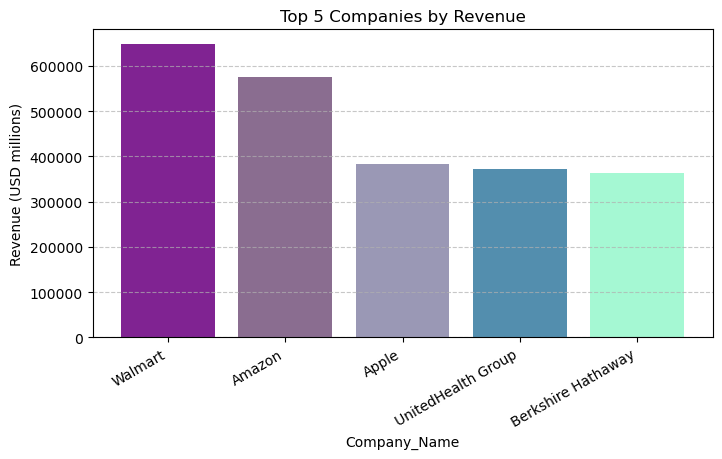

In [43]:
# Plot bar chart
plt.figure(figsize=(8, 4))
plt.bar(top_companies['Name'], top_companies['Revenue (USD millions)'], color=['#802392', '#8A6D90', '#9A98B5', '#538EAE', '#A5F8D3'])
plt.xlabel("Company_Name")
plt.ylabel("Revenue (USD millions)")
plt.title("Top 5 Companies by Revenue")
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Show the plot
plt.show()

In [45]:
#Top 5 companies by revenue in each industry 
top_companies_industry = df.loc[df.groupby('Industry')['Revenue (USD millions)'].idxmax(),['Name', 'Revenue (USD millions)', 'Industry']]
top_industries = top_companies_industry.nlargest(5, 'Revenue (USD millions)')
top_industries

,Name,Revenue (USD millions),Industry
0,Walmart,648125,Retail
1,Amazon,574785,Retail and cloud computing
2,Apple,383482,Electronics industry
3,UnitedHealth Group,371622,Healthcare
4,Berkshire Hathaway,364482,Conglomerate


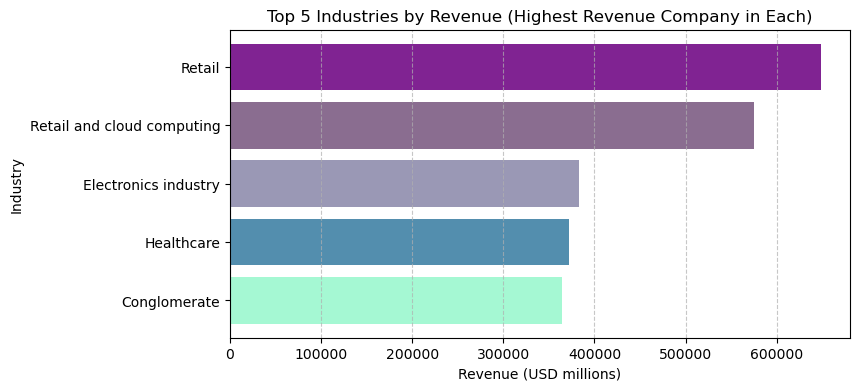

In [47]:
# Plot bar chart
plt.figure(figsize=(8, 4))
plt.barh(top_industries['Industry'], top_industries['Revenue (USD millions)'], color= ['#802392', '#8A6D90', '#9A98B5', '#538EAE', '#A5F8D3'])
plt.xlabel("Revenue (USD millions)")
plt.ylabel("Industry")
plt.title("Top 5 Industries by Revenue (Highest Revenue Company in Each)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [49]:
# Industry Revenue Ranking
industry_revenue = df.groupby('Industry')['Revenue (USD millions)'].sum().reset_index().sort_values(by='Revenue (USD millions)', ascending=False)
industry_revenue

,Industry,Revenue (USD millions)
29,Retail,1615484
15,Financials,1401105
21,Healthcare,1324717
26,Petroleum industry,1220316
32,Technology and cloud computing,581169
30,Retail and cloud computing,574785
9,Conglomerate,501356
27,Pharmaceutical industry,452210
31,Technology,442149
12,Electronics industry,383482


In [51]:
top_industry_revenue = industry_revenue.nlargest(5, 'Revenue (USD millions)')
top_industry_revenue

,Industry,Revenue (USD millions)
29,Retail,1615484
15,Financials,1401105
21,Healthcare,1324717
26,Petroleum industry,1220316
32,Technology and cloud computing,581169


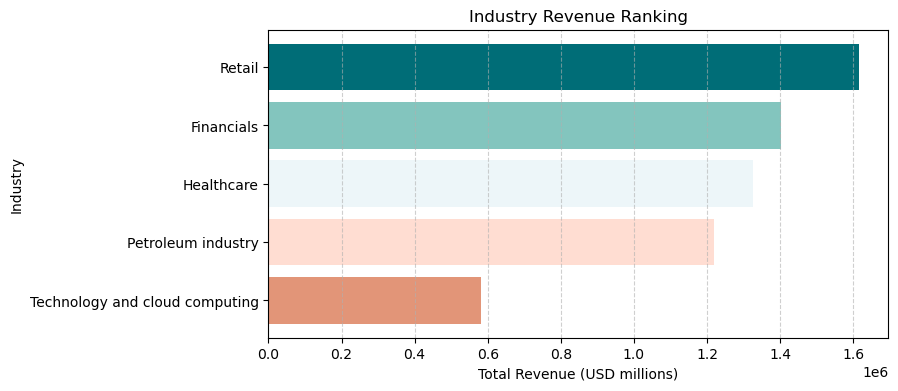

In [53]:
# Plot bar chart
plt.figure(figsize=(8, 4))
plt.barh(top_industry_revenue['Industry'], top_industry_revenue['Revenue (USD millions)'], color= ['#006d77', '#83c5be', '#edf6f9', '#ffddd2', '#e29578'])
plt.xlabel("Total Revenue (USD millions)")
plt.ylabel("Industry")
plt.title("Industry Revenue Ranking")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [55]:
# Fastest Growing Company (Highest Revenue Growth)
Fastest_growing = df.nlargest(5, 'Revenue_Growth(%)')[['Name', 'Revenue_Growth(%)']]

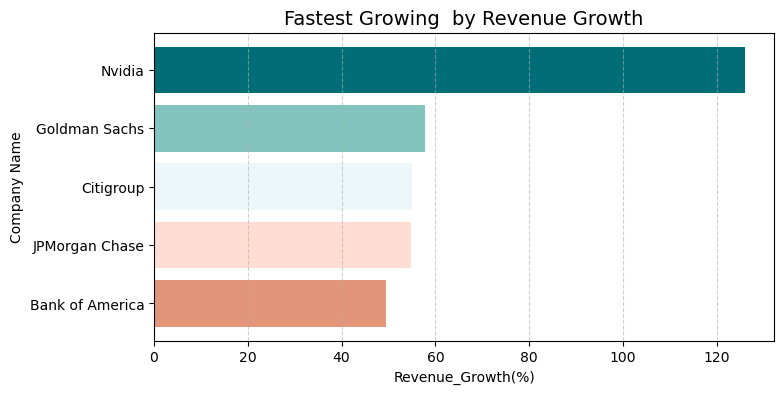

In [65]:
# Plot bar chart
plt.figure(figsize=(8, 4))
plt.barh(Fastest_growing['Name'], Fastest_growing['Revenue_Growth(%)'], color= ['#006d77', '#83c5be', '#edf6f9', '#ffddd2', '#e29578'])
plt.xlabel("Revenue_Growth(%)")
plt.ylabel("Company Name")
plt.title("Fastest Growing  by Revenue Growth", fontsize = 14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [67]:
# 5. Revenue per Employee (Efficiency Measure)
df['Revenue per Employee'] = df['Revenue (USD millions)'] / df['Employees']
revenue_per_employee = df[['Name', 'Revenue per Employee']].sort_values(by='Revenue per Employee', ascending=False).head(10)
revenue_per_employee

,Name,Revenue per Employee
26,Fannie Mae,17.437037
65,StoneX Group,14.710176
28,Valero Energy,13.918194
35,Freddie Mac,13.472569
91,Plains All American Pipeline,11.598095
25,Phillips 66,10.706429
92,World Kinect Corporation,9.020798
23,Marathon Petroleum,8.258626
89,Enterprise Products,6.628667
9,Cencora,5.958477


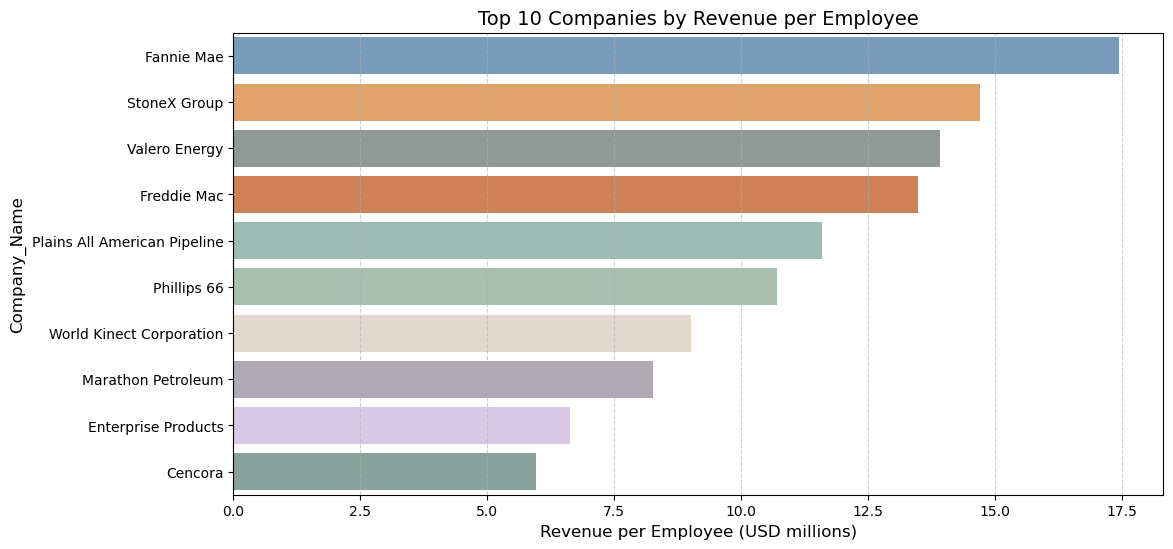

In [69]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue per Employee', y='Name', data=revenue_per_employee, 
            hue='Name', palette=['#6D9DC5', '#F4A259', '#8E9B97', '#E57A44', '#96C0B7', 
                                 '#A4C3B2', '#E7D8C9', '#B0A8B9', '#DAC3E8', '#84A59D'], 
            legend=False)  # Disable legend since hue is just for coloring

# Labels and Title
plt.xlabel("Revenue per Employee (USD millions)", fontsize=12)
plt.ylabel("Company_Name", fontsize=12)
plt.title("Top 10 Companies by Revenue per Employee", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)